# Create the heterogeneous mobility networks for NYC

- The scripts are the same as process_02_create_hetero_mobility_graph
- I separate them into two notebooks to simplify the computational process.



In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import copy
from scipy.sparse import csr_matrix


Bad key text.latex.unicode in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.latex.preview in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 125 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/jtl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 157 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')


In [2]:
# read files.
with open('../../data/02_intermediate/nyc_stays.pickle', 'rb') as f:
    df_nyc = pickle.load(f)
    

In [3]:
# create a stay dictionary
stays = {}
stays['nyc'] = df_nyc


In [4]:
# read the shapefile
with open('../../data/02_intermediate/boston_miami_chicago_nyc_ct_shp_dic.pickle', 'rb') as f:
    shp_dic = pickle.load(f)
    

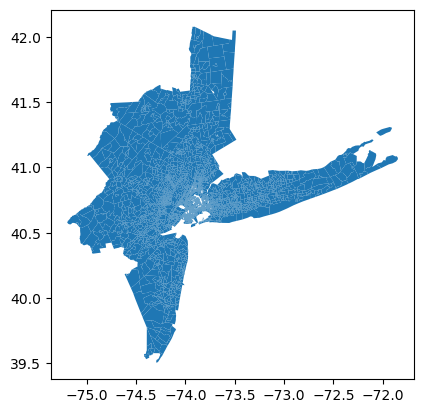

In [5]:
shp_dic['nyc'].plot()
plt.show()

## Converting the stay data to heterogeneous adj metrics

In [9]:
# same function as compute_hetero_A in process_02_create_hetero_mobility_graph
def compute_hetero_A(df_sub, threshold, index_list):
    # Here I create the adjacency matrices
    # Network is built be connecting the home and activity locations. 
    # index_list comes from the df_shp.index; it includes 992 census tracts. 
#     print('start.')
    home_place_vector = df_sub.groupby(['GEOID_home', 'GEOID']).count().iloc[:, 0]
    home_place_m = home_place_vector.unstack(level = 'GEOID')
    home_place_m.values[home_place_m.isna()] = 0
    home_place_m_weighted = home_place_m.sort_index()
    
    # create the unweighted matrix:
    home_place_m_unweighted = copy.copy(home_place_m_weighted)
    epsilon = 0.01 # use the epsilon to include the boundary case
    home_place_m_unweighted.values[home_place_m_unweighted.values < threshold - epsilon] = 0.0  
    home_place_m_unweighted.values[home_place_m_unweighted.values > threshold - epsilon] = 1.0

    # align the names of col and idx.
    col_names = set(home_place_m_unweighted.columns)
    idx_names = set(home_place_m_unweighted.index)
    
    intersection_col_names = col_names.intersection(index_list)
    intersection_idx_names = idx_names.intersection(index_list)
    
    home_place_m_weighted = home_place_m_weighted.loc[intersection_idx_names, intersection_col_names].sort_index()
    home_place_m_unweighted = home_place_m_unweighted.loc[intersection_idx_names, intersection_col_names].sort_index()
    
#     print('end')
    return home_place_m_unweighted, home_place_m_weighted
    

In [8]:
# test an example
activity = 'Office'
threshold = 1.0
index_list = list(shp_dic['nyc'].index)
df_sub = stays['nyc'].loc[stays['nyc'].cat == activity, :]
home_place_m_unweighted, home_place_m_weighted = compute_hetero_A(df_sub, threshold, index_list)
home_place_m_unweighted.sum().sum()
home_place_m_unweighted


start.
end


GEOID,36005037800,36061012600,36081008100,34027045502,36027190401,36103145704,36005019500,34027042600,36005005300,36005037000,...,34013017302,36047112800,36103123301,36119009400,36103158111,36081011200,34003052200,34025810800,34023000603,34025812400
GEOID_home,,,,,,,,,,,,,,,,,,,,,
34003001000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34003002100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34003002200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34003002300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34003003100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36119014907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36119014908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36119014909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Compute the heterogeneous mobility networks regarding activity categories
# 
A_home_activity_weighted_dic = {}
A_home_activity_unweighted_dic = {}

city_list = ['nyc']
threshold_list = [1.0]

# computation: 3 * 3 * 600 (!)
for city in city_list:
    print(city)
    A_home_activity_weighted_dic[city] = {}
    A_home_activity_unweighted_dic[city] = {}
    
    # create the index list.
    index_list = list(shp_dic[city].index)
    activity_categories = list(np.unique(stays[city].cat))
    
    for threshold in threshold_list:
        print(threshold)
        A_home_activity_unweighted_dic[city][threshold] = {}
        for activity in activity_categories:
            print(activity)
            print(activity_categories.index(activity), ' out of ', len(activity_categories))
            df_sub = stays[city].loc[stays[city].cat == activity, :]
            home_place_m_unweighted, home_place_m_weighted = compute_hetero_A(df_sub, threshold, index_list)

            ###
            A_home_activity_weighted_dic[city][activity] = home_place_m_weighted
            A_home_activity_unweighted_dic[city][threshold][activity] = home_place_m_unweighted


nyc
1.0
ATM
0  out of  685
Academic Building
1  out of  685
Accessories
2  out of  685
Acupuncturist
3  out of  685
Administrative Building
4  out of  685
Adult Boutique
5  out of  685
Adult Education Center
6  out of  685
Advertising Agency
7  out of  685
Afghan
8  out of  685
African
9  out of  685
Airport
10  out of  685
Airport Service
11  out of  685
Alternative Healer
12  out of  685
American
13  out of  685
Amphitheater
14  out of  685
Animal Shelter
15  out of  685
Antiques
16  out of  685
Apparel
17  out of  685
Apres Ski Bar
18  out of  685
Aquarium
19  out of  685
Arcade
20  out of  685
Arepas
21  out of  685
Argentinian
22  out of  685
Art Gallery
23  out of  685
Art Museum
24  out of  685
Art Studio
25  out of  685
Arts
26  out of  685
Arts & Crafts
27  out of  685
Arts & Entertainment
28  out of  685
Asian
29  out of  685
Assisted Living
30  out of  685
Astrologer
31  out of  685
Athletics & Sports
32  out of  685
Auditorium
33  out of  685
Australian
34  out of  685
Aust

Herbs & Spices Store
293  out of  685
High School
294  out of  685
Himalayan
295  out of  685
Hindu Temple
296  out of  685
Historic Site
297  out of  685
History
298  out of  685
History Museum
299  out of  685
Hobbies
300  out of  685
Hockey
301  out of  685
Hockey Field
302  out of  685
Hockey Rink
303  out of  685
Home Services
304  out of  685
Hong Kong
305  out of  685
Hookah Bar
306  out of  685
Hospital
307  out of  685
Hospital Ward
308  out of  685
Hostel
309  out of  685
Hot Dogs
310  out of  685
Hot Spring
311  out of  685
Hotel
312  out of  685
Hotel Bar
313  out of  685
Hotpot
314  out of  685
Housing Development
315  out of  685
Hunan
316  out of  685
Hungarian
317  out of  685
Hunting Supply
318  out of  685
IT Services
319  out of  685
Ice Cream
320  out of  685
Indian
321  out of  685
Indian Chinese
322  out of  685
Indie
323  out of  685
Indie Movies
324  out of  685
Indonesian
325  out of  685
Indoor Play Area
326  out of  685
Industrial Estate
327  out of  685
Insu

States & Municipalities
584  out of  685
Stationery Store
585  out of  685
Steakhouse
586  out of  685
Stoop Sale
587  out of  685
Storage
588  out of  685
Street Art
589  out of  685
Street Food Gathering
590  out of  685
Strip Club
591  out of  685
Student Center
592  out of  685
Summer Camp
593  out of  685
Supermarket
594  out of  685
Supplement Shop
595  out of  685
Surf Spot
596  out of  685
Sushi
597  out of  685
Swim School
598  out of  685
Swiss
599  out of  685
Synagogue
600  out of  685
Szechuan
601  out of  685
TV Station
602  out of  685
Tacos
603  out of  685
Tailor
604  out of  685
Taiwanese
605  out of  685
Tanning Salon
606  out of  685
Tapas
607  out of  685
Tattoo
608  out of  685
Taxi
609  out of  685
Taxi Stand
610  out of  685
Tea Room
611  out of  685
Tech Startup
612  out of  685
Technology
613  out of  685
Temple
614  out of  685
Tennis
615  out of  685
Tennis Court
616  out of  685
Terminal
617  out of  685
Tex-Mex
618  out of  685
Thai
619  out of  685
Theate

# Save

In [11]:
with open("../../data/03_processed/A_home_activity_nyc_unweighted_dic.pickle", 'wb') as f:
    pickle.dump(A_home_activity_unweighted_dic, f)


In [12]:
with open("../../data/03_processed/A_home_activity_nyc_weighted_dic.pickle", 'wb') as f:
    pickle.dump(A_home_activity_weighted_dic, f)
